In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mean =  7.76
Std. deviation =  7.3
Min =  2
Max =  104


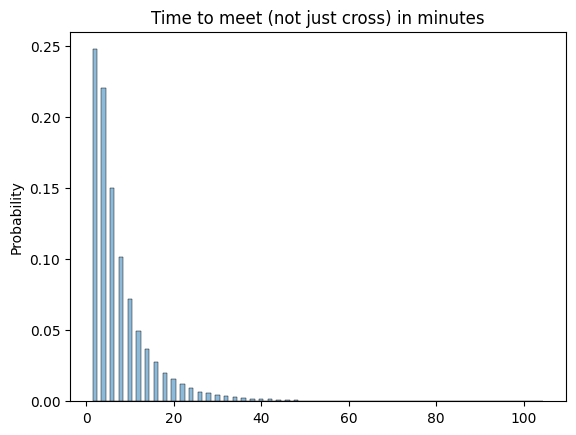

In [101]:
def simulate():

    ja_init_pos, ji_init_pos = 0,5
    ja_cur_pos, ji_cur_pos = ja_init_pos, ji_init_pos

    ja_jump, ji_jump = 1,1.5

    jump = ['left','right']
    minutes = 0

    while ji_cur_pos != ja_cur_pos:

        #Jack
        if ja_cur_pos < ja_jump: # no room to the left
            ja_cur_pos += ja_jump
        elif ja_cur_pos > (ji_init_pos - ja_jump): # no room to the right
            ja_cur_pos -= ja_jump
        else:
            choice = np.random.choice(jump,size = 1) #uniform distribution by default
            if choice == 'left':
                ja_cur_pos = ja_cur_pos - ja_jump
            else:
                ja_cur_pos = ja_cur_pos + ja_jump
            
        #Jill
        if ji_cur_pos < ji_jump: # no room to the left
            ji_cur_pos += ji_jump
        elif ji_cur_pos > (ji_init_pos - ji_jump): # no room to the right
            ji_cur_pos -= ji_jump
        else:
            choice = np.random.choice(jump,size = 1) #uniform distribution by default
            if choice == 'left':
                ji_cur_pos = ji_cur_pos - ji_jump
            else:
                ji_cur_pos = ji_cur_pos + ji_jump
            
        minutes += 1
    
    return minutes

N = 100000
sim = []

for i in range(N):
    result = simulate()
    sim.append(result)

df = pd.DataFrame(data = sim,columns=['minutes'])
print("Mean = ",round(df.minutes.mean(),2))
print("Std. deviation = ",round(df.minutes.std(),2))
print("Min = ",df.minutes.min())
print("Max = ",df.minutes.max())
sns.histplot(df,legend = False,stat = 'probability',discrete= True)
plt.title('Time to meet (not just cross) in minutes')
plt.show()





    
    

In [106]:
df.minutes.value_counts(normalize = True).head(10)

minutes
2     0.24787
4     0.22061
6     0.15022
8     0.10167
10    0.07217
12    0.04948
14    0.03711
16    0.02769
18    0.02000
20    0.01603
Name: proportion, dtype: float64